In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from datasets import Dataset, ClassLabel
from transformers import AutoModelForImageClassification, AutoFeatureExtractor, TrainingArguments, Trainer, ViTForImageClassification, ViTConfig
from huggingface_hub import hf_hub_download

import os

import matplotlib.pyplot as plt

os.environ["WANDB_DISABLED"] = "true"

In [2]:
repo_id = "facebook/sparsh-mae-small"
filename = "mae_vitsmall.safetensors"
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert images to PyTorch tensors
])

num_classes = 5

# Load the dataset
dataset_torch = datasets.ImageFolder(root='objects', transform=transform)
class_names = dataset_torch.classes

dataset = Dataset.from_dict({
    "pixel_values": [img.numpy() for img, _ in dataset_torch],  # Convert tensors to numpy
    "label": [label for _, label in dataset_torch],
})
dataset = dataset.cast_column(
    "label", 
    ClassLabel(names=class_names)  # Map the class names from torchvision dataset
)

split_datasets = dataset.train_test_split(test_size=0.2)
train_dataset = split_datasets["train"]
test_dataset = split_datasets["test"]
file_path = hf_hub_download(repo_id=repo_id, filename=filename, local_dir="pretrained_models/facebook/sparsh-mae-small")
print(f"Downloaded file path: {file_path}")

Casting the dataset:   0%|          | 0/176 [00:00<?, ? examples/s]

Downloaded file path: pretrained_models/facebook/sparsh-mae-small/mae_vitsmall.safetensors


In [3]:
class CustomTouchPrediction(torch.nn.Module):
    def __init__(self, model_name):
        super(CustomTouchPrediction, self).__init__()
        self.config = None

In [4]:
model = ViTForImageClassification.from_pretrained("pretrained_models/facebook/sparsh-mae-small", config=ViTConfig(output_hidden_states=True,num_labels=num_classes), use_safetensors=True)
print(model)
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/vit-mae-base")

Some weights of ViTForImageClassification were not initialized from the model checkpoint at pretrained_models/facebook/sparsh-mae-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.cls_token', 'embeddings.patch_embeddings.projection.bias', 'embeddings.patch_embeddings.projection.weight', 'embeddings.position_embeddings', 'encoder.layer.0.attention.attention.key.bias', 'encoder.layer.0.attention.attention.key.weight', 'encoder.layer.0.attention.attention.query.bias', 'encoder.layer.0.attention.attention.query.weight', 'encoder.layer.0.attention.attention.value.bias', 'encoder.layer.0.attention.attention.value.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.layernorm_after.bias', 'encoder.layer.0.layernorm_after.weight', 'encoder.layer.0.layernorm_before.bias', 'encoder.layer.0.layernorm_before

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

/home/matthew/miniconda3/envs/tactile_ssl/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


/home/matthew/miniconda3/envs/tactile_ssl/lib/python3.9/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


torch.Size([10, 3, 224, 224])
(tensor([[[-3.2029e-02, -4.1552e-04,  1.0610e-02,  ..., -1.8354e-02,
          -1.9268e-03, -5.3574e-02],
         [ 2.3963e-01,  2.1135e-01,  1.3116e-01,  ...,  2.8102e-01,
           3.6336e-01,  1.0068e-01],
         [ 2.1361e-01,  1.9546e-01,  1.7958e-01,  ...,  2.9990e-01,
           3.8513e-01,  1.1509e-01],
         ...,
         [ 1.5465e-01,  2.3402e-01,  1.3677e-01,  ...,  2.4403e-01,
           3.6744e-01, -1.9587e-02],
         [ 1.2968e-01,  2.2516e-01,  1.5325e-01,  ...,  2.1774e-01,
           3.2493e-01, -7.3811e-02],
         [ 1.1752e-01,  1.8024e-01,  1.3046e-01,  ...,  1.7159e-01,
           2.8212e-01, -5.3820e-02]],

        [[-3.2029e-02, -4.1552e-04,  1.0610e-02,  ..., -1.8354e-02,
          -1.9268e-03, -5.3574e-02],
         [ 1.8084e-01,  1.6812e-01,  9.4869e-02,  ...,  2.2408e-01,
           2.9195e-01,  5.2393e-02],
         [ 1.5602e-01,  1.3452e-01,  1.3132e-01,  ...,  2.5536e-01,
           2.8525e-01,  8.4640e-02],
        

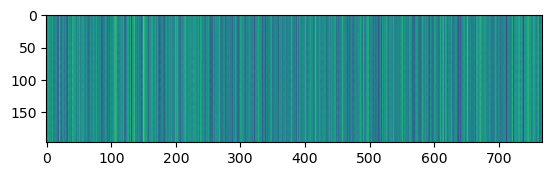

torch.Size([10, 197, 768])


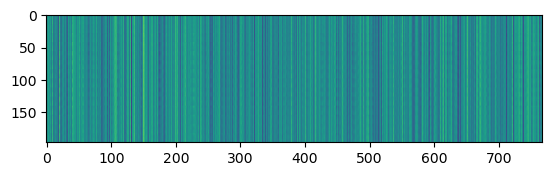

torch.Size([10, 197, 768])


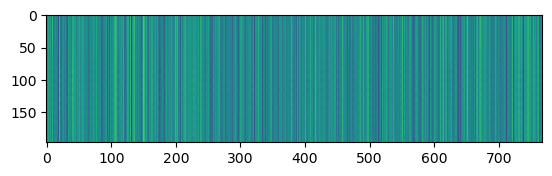

torch.Size([10, 197, 768])


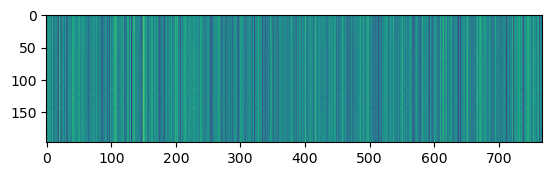

torch.Size([10, 197, 768])


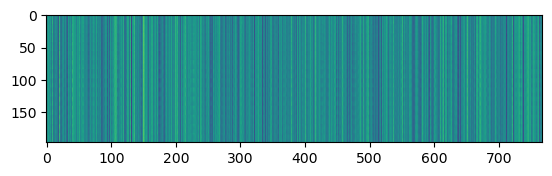

torch.Size([10, 197, 768])


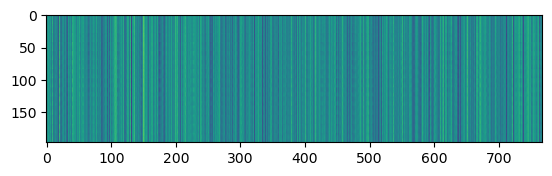

torch.Size([10, 197, 768])


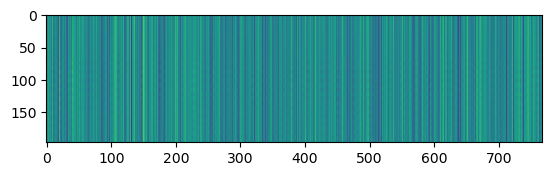

torch.Size([10, 197, 768])


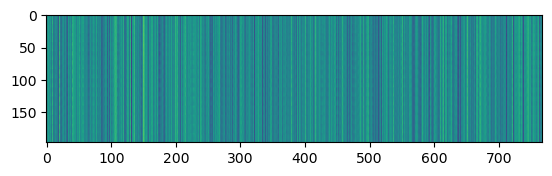

torch.Size([10, 197, 768])


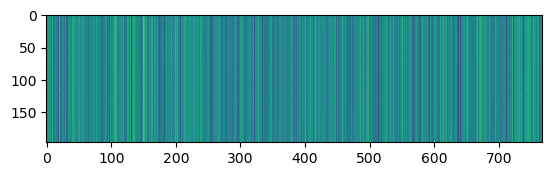

torch.Size([10, 197, 768])


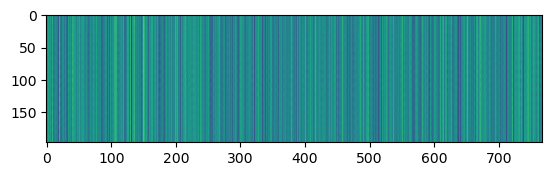

torch.Size([10, 197, 768])


In [6]:
import numpy as np

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=5,
    per_device_eval_batch_size=5,
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=10
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

images = torch.tensor([img.numpy() for img, _ in dataset_torch])


images = images[-10:].to(device='cuda')
print(images.shape)

#output = trainer.predict(test_dataset)

#print(output)

output = model(images).hidden_states

print(output, len(output))
for i in range(len(output[-1])):
    plt.imshow(output[-1][i].cpu().detach())
    plt.show()

    print(output[-1].shape)